In [25]:
import numpy as np
import os
import matplotlib.pyplot as plt

sgd_fs = [f for f in os.listdir() if f.endswith('.npy') and ('sgd.' in f) and '2f' not in f and 'LIRA' not in f]
sgd_fs = sorted(sgd_fs, key=lambda x: float(x.split('_')[0]))
print(sgd_fs)

sgd_only_fs = [f for f in os.listdir() if f.endswith('.npy') and ('sgd_only.' in f) and '2f' not in f and 'LIRA' not in f]
sgd_only_fs = sorted(sgd_only_fs, key=lambda x: float(x.split('_')[0]))
print(sgd_only_fs)

sgd_fs_LIRA = [f for f in os.listdir() if f.endswith('.npy') and ('sgd_2f' in f) and 'LIRA' in f]
sgd_fs_LIRA = sorted(sgd_fs_LIRA, key=lambda x: float(x.split('_')[0]))
print(sgd_fs_LIRA)

sgd_only_fs_LIRA = [f for f in os.listdir() if f.endswith('.npy') and ('sgd_only' in f) and 'LIRA' in f]
sgd_only_fs_LIRA = sorted(sgd_only_fs_LIRA, key=lambda x: float(x.split('_')[0]))
print(sgd_only_fs_LIRA)

['250_sgd.npy', '500_sgd.npy', '1000_sgd.npy', '2000_sgd.npy', '4000_sgd.npy', '8000_sgd.npy']
['250_sgd_only.npy', '500_sgd_only.npy', '1000_sgd_only.npy', '2000_sgd_only.npy', '4000_sgd_only.npy', '8000_sgd_only.npy']
['250_25000_sgd_sgd_2f_LIRA.npy', '500_25000_sgd_sgd_2f_LIRA.npy', '1000_25000_sgd_sgd_2f_LIRA.npy', '2000_25000_sgd_sgd_2f_LIRA.npy', '4000_25000_sgd_sgd_2f_LIRA.npy', '8000_25000_sgd_sgd_2f_LIRA.npy']
['250_25000_sgd_sgd_only_2f_LIRA.npy', '500_25000_sgd_sgd_only_2f_LIRA.npy', '1000_25000_sgd_sgd_only_2f_LIRA.npy', '2000_25000_sgd_sgd_only_2f_LIRA.npy', '4000_25000_sgd_sgd_only_2f_LIRA.npy', '8000_25000_sgd_sgd_only_2f_LIRA.npy']


In [26]:
losses = [np.load(file, allow_pickle=True)[0] for file in sgd_fs]
gap = [np.load(file, allow_pickle=True)[1] for file in sgd_fs]
ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_fs]
lira = [np.load(file, allow_pickle=True)[0] for file in sgd_fs_LIRA]
lira_ratio = [np.load(file, allow_pickle=True)[1] for file in sgd_fs_LIRA]

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_fs]
ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_fs]

loss_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_fs]
ratio_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_fs]

loss_precision_calibrate = [np.load(file, allow_pickle=True)[7] for file in sgd_fs]
ratio_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_fs]

loss_precision_shadow = [np.load(file, allow_pickle=True)[9] for file in sgd_fs]
ratio_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_fs]

lira_precision = [np.load(file, allow_pickle=True)[2] for file in sgd_fs_LIRA]
lira_ratio_precision = [np.load(file, allow_pickle=True)[3] for file in sgd_fs_LIRA]

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_fs]
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_fs]

nup_losses_shadow = [np.load(file, allow_pickle=True)[13] for file in sgd_fs]

nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_fs]

nup_loss_precision_shadow = [np.load(file, allow_pickle=True)[15] for file in sgd_fs]

nup_loss_precision_calibrate = [np.load(file, allow_pickle=True)[16] for file in sgd_fs]

nup_lira = [np.load(file, allow_pickle=True)[4] for file in sgd_fs_LIRA]
nup_lira_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_fs_LIRA]

initial_train_acc = [np.load(file, allow_pickle=True)[17] for file in sgd_fs]
initial_test_acc = [np.load(file, allow_pickle=True)[18] for file in sgd_fs]
post_train_acc = [np.load(file, allow_pickle=True)[19] for file in sgd_fs]
post_test_acc = [np.load(file, allow_pickle=True)[20] for file in sgd_fs]

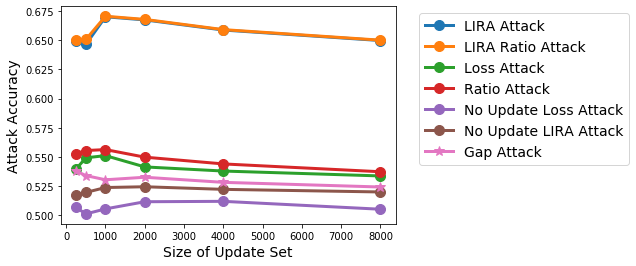

In [27]:
ds = [250, 500, 1000, 2000, 4000, 8000]

plt.plot(ds, [np.mean(x) for x in lira], 
         'o', label='LIRA Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in lira_ratio], 
         'o', label='LIRA Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in losses], 
         'o', label='Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio], 
         'o', label='Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses], 
         'o', label='No Update Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_lira], 
         'o', label='No Update LIRA Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('purchase_condensed_sgd.png')
plt.show()

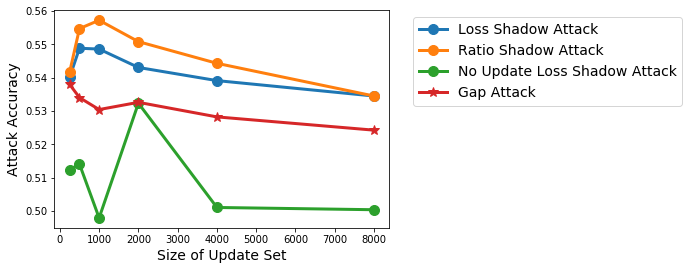

In [28]:
plt.plot(ds, [np.mean(x) for x in losses_shadow], 
         'o', label='Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio_shadow], 
         'o', label='Ratio Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_shadow], 
         'o', label='No Update Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('purchase_shadow_condensed_sgd.png')
plt.show()

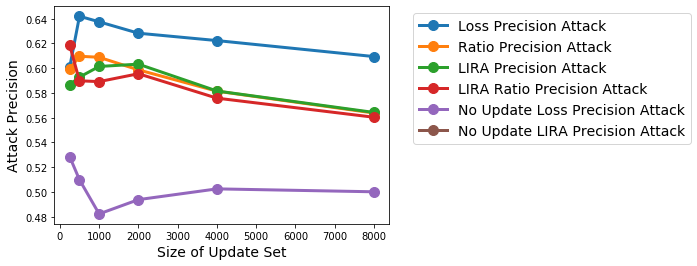

In [29]:
plt.plot(ds, [np.mean([i[0] for i in x]) for x in loss_precision], 
         'o', label='Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in ratio_precision], 
         'o', label='Ratio Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in lira_precision], 
         'o', label='LIRA Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in lira_ratio_precision], 
         'o', label='LIRA Ratio Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in nup_loss_precision], 
         'o', label='No Update Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in nup_lira_precision], 
         'o', label='No Update LIRA Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('purchase_precision_condensed_sgd.png')
plt.show()

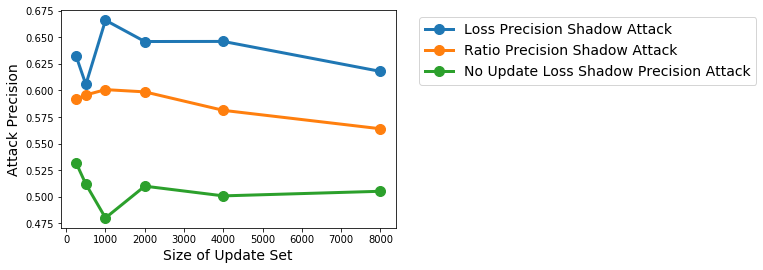

In [30]:
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in loss_precision_shadow], 
         'o', label='Loss Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in ratio_precision_shadow], 
         'o', label='Ratio Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in nup_loss_precision_shadow], 
         'o', label='No Update Loss Shadow Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('purchase_shadow_precision_condensed_sgd.png')
plt.show()

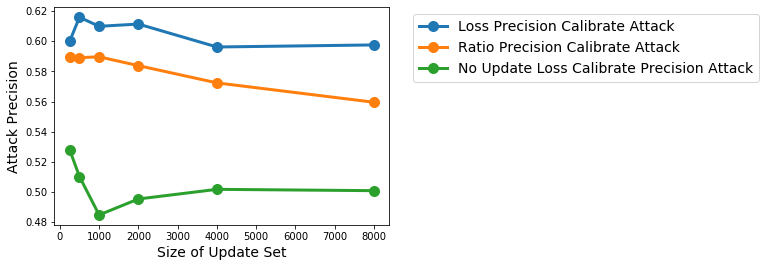

In [31]:
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in loss_precision_calibrate], 
         'o', label='Loss Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in ratio_precision_calibrate], 
         'o', label='Ratio Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in nup_loss_precision_calibrate], 
         'o', label='No Update Loss Calibrate Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('purchase_calibrate_precision_condensed_sgd.png')
plt.show()

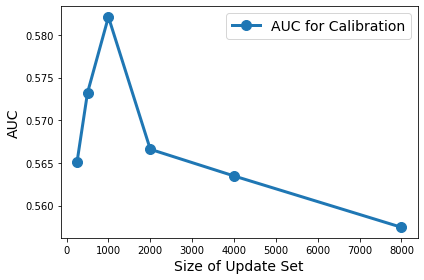

0.5651086756769598 0.5665968467490597


In [32]:
from sklearn.metrics import auc

total_precisions = [[np.nanmean([i[percentile][0] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
total_recalls = [[np.nanmean([i[percentile][1] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
aucs = []

for precisions, recalls in zip(total_precisions, total_recalls):
#     print(precisions)
#     print(recalls)
#     print('===============')
    aucs.append(auc(recalls, precisions))
    
plt.plot(ds, aucs, 
         'o', label='AUC for Calibration', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('AUC', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

print(aucs[0], aucs[3])

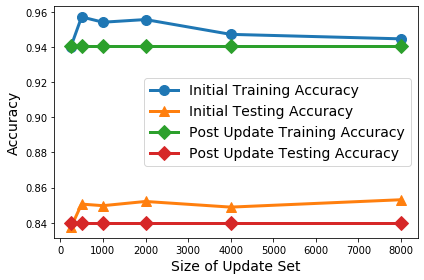

In [33]:
plt.plot(ds, [np.mean(x) for x in initial_train_acc], 
         'o', label='Initial Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in initial_test_acc], 
         '^', label='Initial Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_train_acc], 
         'D', label='Post Update Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_test_acc], 
         'D', label='Post Update Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
# plt.ylim(0.5, 0.675)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Accuracy', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [34]:
losses = [np.load(file, allow_pickle=True)[0] for file in sgd_only_fs]
gap = [np.load(file, allow_pickle=True)[1] for file in sgd_only_fs]
ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs]
lira = [np.load(file, allow_pickle=True)[0] for file in sgd_only_fs_LIRA]
lira_ratio = [np.load(file, allow_pickle=True)[1] for file in sgd_only_fs_LIRA]

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_only_fs]
ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_only_fs]

loss_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_only_fs]
ratio_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_only_fs]

loss_precision_calibrate = [np.load(file, allow_pickle=True)[7] for file in sgd_only_fs]
ratio_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_only_fs]

loss_precision_shadow = [np.load(file, allow_pickle=True)[9] for file in sgd_only_fs]
ratio_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_only_fs]

lira_precision = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs_LIRA]
lira_ratio_precision = [np.load(file, allow_pickle=True)[3] for file in sgd_only_fs_LIRA]

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_only_fs]
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_only_fs]

nup_losses_shadow = [np.load(file, allow_pickle=True)[13] for file in sgd_only_fs]

nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_only_fs]

nup_loss_precision_shadow = [np.load(file, allow_pickle=True)[15] for file in sgd_only_fs]

nup_loss_precision_calibrate = [np.load(file, allow_pickle=True)[16] for file in sgd_only_fs]

nup_lira = [np.load(file, allow_pickle=True)[4] for file in sgd_only_fs_LIRA]
nup_lira_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_only_fs_LIRA]

initial_train_acc = [np.load(file, allow_pickle=True)[17] for file in sgd_only_fs]
initial_test_acc = [np.load(file, allow_pickle=True)[18] for file in sgd_only_fs]
post_train_acc = [np.load(file, allow_pickle=True)[19] for file in sgd_only_fs]
post_test_acc = [np.load(file, allow_pickle=True)[20] for file in sgd_only_fs]

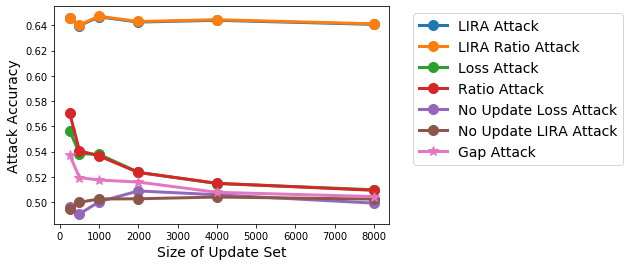

In [35]:
plt.plot(ds, [np.mean(x) for x in lira], 
         'o', label='LIRA Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in lira_ratio], 
         'o', label='LIRA Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in losses], 
         'o', label='Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio], 
         'o', label='Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses], 
         'o', label='No Update Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_lira], 
         'o', label='No Update LIRA Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('purchase_condensed_sgd_only.png')
plt.show()

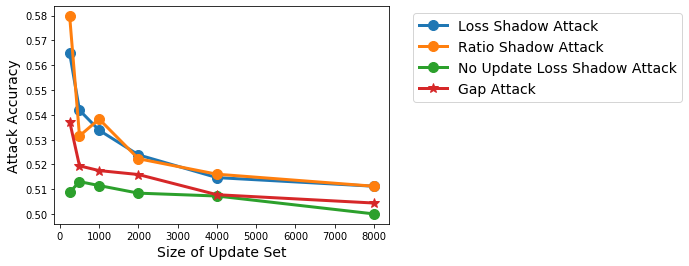

In [36]:
plt.plot(ds, [np.mean(x) for x in losses_shadow], 
         'o', label='Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio_shadow], 
         'o', label='Ratio Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_shadow], 
         'o', label='No Update Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('purchase_shadow_condensed_sgd_only.png')
plt.show()

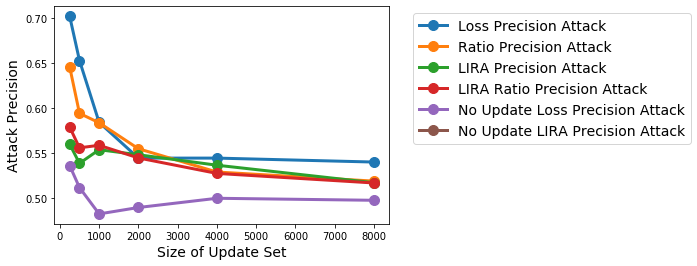

In [37]:
plt.plot(ds, [np.mean([i[0] for i in x]) for x in loss_precision], 
         'o', label='Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in ratio_precision], 
         'o', label='Ratio Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in lira_precision], 
         'o', label='LIRA Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in lira_ratio_precision], 
         'o', label='LIRA Ratio Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in nup_loss_precision], 
         'o', label='No Update Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in nup_lira_precision], 
         'o', label='No Update LIRA Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('purchase_precision_condensed_sgd_only.png')
plt.show()

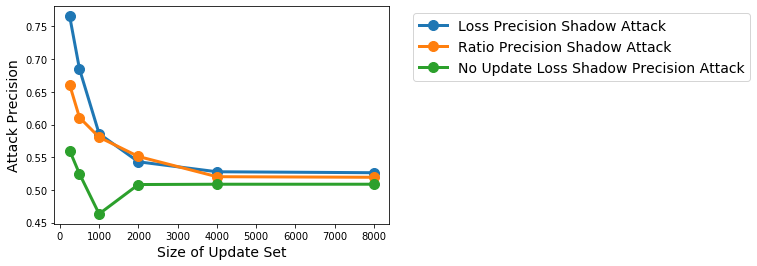

In [38]:
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in loss_precision_shadow], 
         'o', label='Loss Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in ratio_precision_shadow], 
         'o', label='Ratio Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in nup_loss_precision_shadow], 
         'o', label='No Update Loss Shadow Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('purchase_shadow_precision_condensed_sgd_only.png')
plt.show()

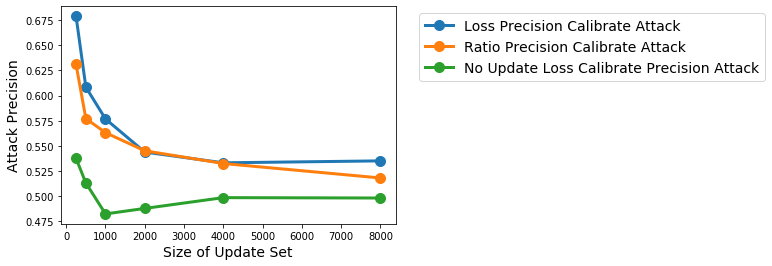

In [39]:
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in loss_precision_calibrate], 
         'o', label='Loss Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in ratio_precision_calibrate], 
         'o', label='Ratio Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in nup_loss_precision_calibrate], 
         'o', label='No Update Loss Calibrate Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('purchase_calibrate_precision_condensed_sgd_only.png')
plt.show()

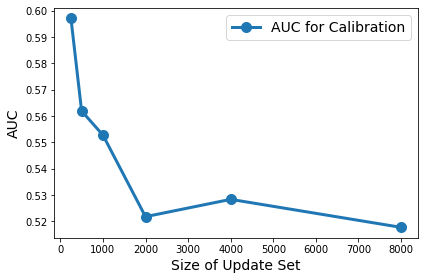

0.5969924742321868 0.5217060853643675


In [40]:
from sklearn.metrics import auc

total_precisions = [[np.nanmean([i[percentile][0] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
total_recalls = [[np.nanmean([i[percentile][1] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
aucs = []

for precisions, recalls in zip(total_precisions, total_recalls):
#     print(precisions)
#     print(recalls)
#     print('===============')
    aucs.append(auc(recalls, precisions))
    
plt.plot(ds, aucs, 
         'o', label='AUC for Calibration', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('AUC', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()
print(aucs[0], aucs[3])

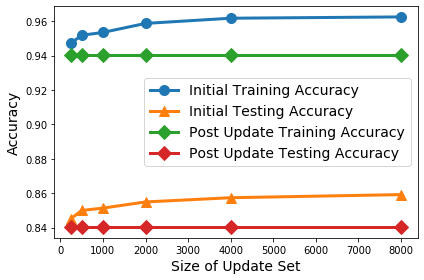

In [41]:
plt.plot(ds, [np.mean(x) for x in initial_train_acc], 
         'o', label='Initial Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in initial_test_acc], 
         '^', label='Initial Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_train_acc], 
         'D', label='Post Update Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_test_acc], 
         'D', label='Post Update Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
# plt.ylim(0.5, 0.675)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Accuracy', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

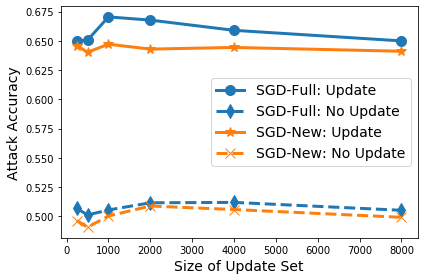

In [42]:
ds = [250, 500, 1000, 2000, 4000, 8000]

ratio_median_sgd = [np.load(file, allow_pickle=True)[2] for file in sgd_fs]
ratio_median_sgd_only = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs]
ratio_lira_sgd = [np.load(file, allow_pickle=True)[1] for file in sgd_fs_LIRA]
ratio_lira_sgd_only = [np.load(file, allow_pickle=True)[1] for file in sgd_only_fs_LIRA]

nup_losses_median_sgd = [np.load(file, allow_pickle=True)[11] for file in sgd_fs]
nup_losses_median_sgd_only = [np.load(file, allow_pickle=True)[11] for file in sgd_only_fs]

plt.plot(ds, [np.mean(x) for x in ratio_lira_sgd], 
         'o', label='SGD-Full: Update', color='C0',
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_median_sgd], 
         'd', label='SGD-Full: No Update', color='C0',
         linestyle='--', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio_lira_sgd_only], 
         '*', label='SGD-New: Update', color='C1',
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_median_sgd_only], 
         'x', label='SGD-New: No Update', color='C1', 
         linestyle='--', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('purchase_condensed.png')
plt.show()

In [43]:
nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_fs]
print(np.mean([x[0] for x in nup_loss_precision[0]]), np.mean([x[1] for x in nup_loss_precision[0]]))
print(np.mean([x[0] for x in nup_loss_precision[3]]), np.mean([x[1] for x in nup_loss_precision[3]]))
print('==================')

loss_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_fs]
print(np.mean([x[0] for x in loss_precision[0]]), np.mean([x[1] for x in loss_precision[0]]))
print(np.mean([x[0] for x in loss_precision[3]]), np.mean([x[1] for x in loss_precision[3]]))
print('==================')

loss_precision_shadow = [np.load(file, allow_pickle=True)[9] for file in sgd_fs]
print(np.nanmean([x[0] for x in loss_precision_shadow[0]]), np.nanmean([x[1] for x in loss_precision_shadow[0]]))
print(np.nanmean([x[0] for x in loss_precision_shadow[3]]), np.nanmean([x[1] for x in loss_precision_shadow[3]]))
print('==================')

loss_precision_calibrate = [np.load(file, allow_pickle=True)[7] for file in sgd_fs]
print(np.mean([x[1][0] for x in loss_precision_calibrate[0]]), np.mean([x[1][1] for x in loss_precision_calibrate[0]]))
print(np.mean([x[1][0] for x in loss_precision_calibrate[3]]), np.mean([x[1][1] for x in loss_precision_calibrate[3]]))
print('==================')

0.5285170068027212 0.10566666666666666
0.49379166666666663 0.09875833333333334
0.6006666666666668 0.12013333333333334
0.6282916666666666 0.12565833333333332
0.6325406513492495 0.07433333333333332
0.6460338043402671 0.10262500000000001
0.600039646391287 0.13746666666666665
0.6114255238683474 0.158725


In [44]:
nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_only_fs]
print(np.mean([x[0] for x in nup_loss_precision[0]]), np.mean([x[1] for x in nup_loss_precision[0]]))
print(np.mean([x[0] for x in nup_loss_precision[3]]), np.mean([x[1] for x in nup_loss_precision[3]]))
print('==================')

loss_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_only_fs]
print(np.mean([x[0] for x in loss_precision[0]]), np.mean([x[1] for x in loss_precision[0]]))
print(np.mean([x[0] for x in loss_precision[3]]), np.mean([x[1] for x in loss_precision[3]]))
print('==================')

loss_precision_shadow = [np.load(file, allow_pickle=True)[9] for file in sgd_only_fs]
print(np.nanmean([x[0] for x in loss_precision_shadow[0]]), np.nanmean([x[1] for x in loss_precision_shadow[0]]))
print(np.nanmean([x[0] for x in loss_precision_shadow[3]]), np.nanmean([x[1] for x in loss_precision_shadow[3]]))
print('==================')

loss_precision_calibrate = [np.load(file, allow_pickle=True)[7] for file in sgd_only_fs]
print(np.mean([x[1][0] for x in loss_precision_calibrate[0]]), np.mean([x[1][1] for x in loss_precision_calibrate[0]]))
print(np.mean([x[1][0] for x in loss_precision_calibrate[3]]), np.mean([x[1][1] for x in loss_precision_calibrate[3]]))
print('==================')

0.5363333333333333 0.10726666666666665
0.489937969924812 0.09798333333333334
0.7016666666666665 0.14033333333333334
0.544625 0.10892500000000001
0.7654656979242166 0.08619999999999998
0.5430043104404491 0.21531666666666668
0.6787880857720526 0.18319999999999997
0.5438665318589538 0.12236666666666667


In [45]:
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_fs]
print(np.mean([x for x in nup_gap[0]]))
print('==================')

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_fs]
print(np.mean([x for x in nup_losses[0]]))
print('==================')

# losses = [np.load(file, allow_pickle=True)[0] for file in sgd_fs]
# print(np.nanmean([x for x in losses[0]]))
# print('==================')

# losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_fs]
# print(np.mean([x for x in losses_shadow[0]]))
# print('==================')

ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_fs]
print(np.mean([x for x in ratio[0]]))
print('==================')

ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_fs]
print(np.mean([x for x in ratio_shadow[0]]))
print('==================')



0.5127666666666666
0.5068
0.5528000000000001
0.5417333333333333


In [46]:
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_only_fs]
print(np.mean([x for x in nup_gap[0]]))
print('==================')

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_only_fs]
print(np.mean([x for x in nup_losses[0]]))
print('==================')

losses = [np.load(file, allow_pickle=True)[0] for file in sgd_only_fs]
print(np.nanmean([x for x in losses[0]]))
print('==================')

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_only_fs]
print(np.mean([x for x in losses_shadow[0]]))
print('==================')

ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs]
print(np.mean([x for x in ratio[0]]))
print('==================')

ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_only_fs]
print(np.mean([x for x in ratio_shadow[0]]))
print('==================')

0.5127666666666666
0.49640000000000006
0.5566666666666666
0.5648000000000001
0.5704
0.5797333333333334


In [47]:
lira = [np.load(file, allow_pickle=True)[0] for file in sgd_fs_LIRA]
lira_ratio = [np.load(file, allow_pickle=True)[1] for file in sgd_fs_LIRA]
print(np.mean([x for x in lira[0]]))
print('==================')
print(np.mean([x for x in lira_ratio[0]]))
print('==================')

0.6496333333333334
0.6499666666666666


In [48]:
lira = [np.load(file, allow_pickle=True)[0] for file in sgd_only_fs_LIRA]
lira_ratio = [np.load(file, allow_pickle=True)[1] for file in sgd_only_fs_LIRA]
print(np.mean([x for x in lira[0]]))
print('==================')
print(np.mean([x for x in lira_ratio[0]]))
print('==================')

0.6455000000000001
0.6459
